In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID721red_train.csv')
test = pd.read_csv('AID721red_test.csv')

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


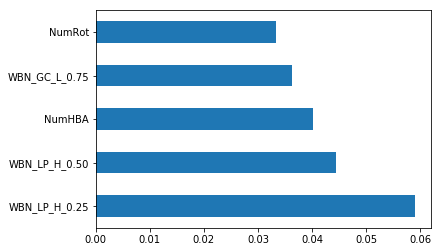

In [3]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1
    
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)

# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

# Select best features for the label
model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [4]:
# Create dataframe with olny the best features
x_train = x_train[['NumRot', 'WBN_GC_L_0.75', 'NumHBA', 'WBN_LP_H_0.50', 'WBN_LP_H_0.25']]

x_test = x_test[['NumRot', 'WBN_GC_L_0.75', 'NumHBA', 'WBN_LP_H_0.50', 'WBN_LP_H_0.25']]

In [13]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(128, input_dim=5, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.nadam(lr=.0001)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [15]:
model.fit(x_train, y_train,
          epochs=100,
          batch_size=128)

Epoch 1/100
76/76 [==============================] - 0s 156us/step - loss: 0.6961 - acc: 0.4079
Epoch 2/100
76/76 [==============================] - 0s 162us/step - loss: 0.6895 - acc: 0.5263
Epoch 3/100
76/76 [==============================] - 0s 107us/step - loss: 0.6830 - acc: 0.5658
Epoch 4/100
76/76 [==============================] - 0s 210us/step - loss: 0.6766 - acc: 0.6053
Epoch 5/100
76/76 [==============================] - 0s 100us/step - loss: 0.6703 - acc: 0.7368
Epoch 6/100
76/76 [==============================] - 0s 144us/step - loss: 0.6641 - acc: 0.6974
Epoch 7/100
76/76 [==============================] - 0s 143us/step - loss: 0.6581 - acc: 0.7763
Epoch 8/100
76/76 [==============================] - 0s 137us/step - loss: 0.6521 - acc: 0.7763
Epoch 9/100
76/76 [==============================] - 0s 154us/step - loss: 0.6464 - acc: 0.7763
Epoch 10/100
76/76 [==============================] - 0s 137us/step - loss: 0.6407 - acc: 0.7763
Epoch 11/100
76/76 [===================

Epoch 86/100
76/76 [==============================] - 0s 171us/step - loss: 0.5176 - acc: 0.7763
Epoch 87/100
76/76 [==============================] - 0s 163us/step - loss: 0.5175 - acc: 0.7763
Epoch 88/100
76/76 [==============================] - 0s 78us/step - loss: 0.5174 - acc: 0.7763
Epoch 89/100
76/76 [==============================] - 0s 107us/step - loss: 0.5173 - acc: 0.7763
Epoch 90/100
76/76 [==============================] - 0s 108us/step - loss: 0.5172 - acc: 0.7763
Epoch 91/100
76/76 [==============================] - 0s 92us/step - loss: 0.5171 - acc: 0.7763
Epoch 92/100
76/76 [==============================] - 0s 100us/step - loss: 0.5170 - acc: 0.7763
Epoch 93/100
76/76 [==============================] - 0s 95us/step - loss: 0.5169 - acc: 0.7763
Epoch 94/100
76/76 [==============================] - 0s 109us/step - loss: 0.5168 - acc: 0.7763
Epoch 95/100
76/76 [==============================] - 0s 107us/step - loss: 0.5167 - acc: 0.7763
Epoch 96/100
76/76 [=============

In [16]:
score = model.evaluate(x_test, y_test, batch_size=128)
print('Score', score)

18/18 [==============================] - 0s 9ms/step
Score [0.5395108461380005, 0.7777777910232544]
